#**Analisis Faktor-Faktor yang Mempengaruhi Biaya Asuransi Menggunakan Dataset Medical Insurance Cost**

#**Import Library**

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#**Business Understanding**

##**Business Objective**

Dataset Medical Insurance Cost

Dataset yang digunakan merupakan data biaya asuransi kesehatan yang berisi 1338 data individu dengan karakteristik seperti usia, jenis kelamin, indeks massa tubuh (BMI), jumlah anak, status merokok, wilayah tempat tinggal, serta biaya asuransi. Data ini mencerminkan variasi kondisi dan tingkat risiko masing-masing pelanggan dalam layanan asuransi kesehatan.

Masalah bisnis yang dihadapi adalah bagaimana perusahaan dapat menentukan premi asuransi yang adil dan sesuai dengan tingkat risiko pelanggan. Perbedaan karakteristik individu dapat menyebabkan perbedaan biaya klaim yang signifikan. Jika perusahaan tidak memahami faktor-faktor yang memengaruhi besarnya biaya asuransi, maka penetapan premi berpotensi tidak akurat.

Analisis pada dataset Medical Insurance Cost ini bertujuan untuk membantu perusahaan asuransi memahami faktor-faktor yang mempengaruhi besarnya biaya asuransi. Dengan melakukan analisis ini, perusahaan diharapkan mendapat insight mengenai variabel mana yang memberikan pengaruh signifikan terhadap peningkatan biaya. Hasil analisis ini dapat digunakan untuk mendukung pengambilan keputusan dalam penetapan premi yang lebih tepat dan akurat.

##**Assess Situation**

Situasi bisnis yang mendasari analisis ini adalah meningkatnya biaya layanan kesehatan yang berdampak langsung terhadap besarnya klaim asuransi. Perusahaan asuransi perlu memastikan bahwa premi yang ditetapkan sesuai dengan tingkat risiko masing-masing pelanggan. Jika premi yang ditetapkan terlalu rendah, perusahaan berpotensi mengalami kerugian. Sebaliknya, jika premi terlalu tinggi, pelanggan bisa merasa terbebani dan tidak puas terhadap layanan yang diberikan. Dataset yang digunakan berisi 1338 data individu dengan berbagai karakteristik, seperti usia, jenis kelamin, indeks massa tubuh (BMI), jumlah anak, status merokok, dan wilayah tempat tinggal. Perbedaan karakteristik tersebut mencerminkan tingkat risiko yang berbeda-beda pada setiap pelanggan. Variasi ini menyebabkan perbedaan biaya asuransi yang cukup signifikan, sehingga perusahaan menghadapi tantangan dalam menentukan premi yang adil berdasarkan risiko.

Meskipun seluruh data telah tersedia dalam bentuk digital, terdapat beberapa tantangan dalam proses analisis. Rentang nilai biaya asuransi yang cukup besar menunjukkan kemungkinan adanya distribusi yang tidak merata atau nilai ekstrem (outlier) yang dapat memengaruhi hasil pemodelan. Selain itu, variabel kategorikal seperti jenis kelamin, wilayah, dan status merokok perlu diolah terlebih dahulu sebelum digunakan dalam analisis. Oleh karena itu, diperlukan proses analisis data yang sistematis untuk memahami pola biaya asuransi, mengidentifikasi faktor-faktor yang paling berpengaruh, serta mendukung penetapan premi yang lebih akurat dan berbasis risiko.



##**Analytic Goals Project Plan**

Dalam dataset ini akan dilakukan:


*   Mengidentifikasi faktor-faktor yang mempengaruhi biaya asuransi kesehatan
*   Menganalisis hubungan antara usia, BMI, jumlah anak, dan kebiasaan merokok terhadap biaya asuransi
* Membuat visualisasi untuk membantu memahami pola data dan hubungan antar variabel
* Memberikan rekomendasi berbasis data guna mendukung penetapan premi yang lebih akurat dan sesuai dengan tingkat risiko pelanggan berdasarkan analisis data




#**Data Understanding**

##**Memuat Dataset**

In [35]:
file = "/content/drive/MyDrive/AVD/insurance (1).csv"
df = pd.read_csv(file)
df

,age,sex,bmi,children,smoker,region,charges,Kategori_BMI,Kategori_Usia
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Dewasa Awal
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Dewasa Awal
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Dewasa Awal
3,33,male,22.705,0,no,northwest,21984.47061,Normal,Dewasa
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Dewasa
...,...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830,Obese,Lansia
1333,18,female,31.920,0,no,northeast,2205.98080,Obese,Dewasa Awal
1334,18,female,36.850,0,no,southeast,1629.83350,Obese,Dewasa Awal
1335,21,female,25.800,0,no,southwest,2007.94500,Overweight,Dewasa Awal


##**Deskripsi Data**

###**Informasi Lanjutan**

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1337 non-null   int64  
 1   sex            1337 non-null   object 
 2   bmi            1337 non-null   float64
 3   children       1337 non-null   int64  
 4   smoker         1337 non-null   object 
 5   region         1337 non-null   object 
 6   charges        1337 non-null   float64
 7   Kategori_BMI   1337 non-null   object 
 8   Kategori_Usia  1337 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 94.1+ KB




1. age
Jumlah baris: 1338
Tipe data: int64
Deskripsi: Umur orang yang diasuransikan
2. sex
Jumlah baris: 1338
Tipe data: object
Deskripsi: Jenis kelamin orang yang diasuransikan (male/female)
3. bmi
Jumlah baris: 1338
Tipe data: float64
Deskripsi: Body Mass Index (BMI)
4. children
Jumlah baris: 1338
Tipe data: int64
Deskripsi: Jumlah anak yang dimiliki
5. smoker
Jumlah baris: 1338
Tipe data: object
Deskripsi: Status perokok
6. region
Jumlah baris: 1338
Tipe data: object
Deskripsi: Wilayah tempat tinggal
7. charges
Jumlah baris: 1338
Tipe data: float64
Deskripsi: Biaya asuransi yang harus dibayar

###**Informasi Statistik Deskriptif**


In [37]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges,Kategori_BMI,Kategori_Usia
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000,1337,1337
unique,NaN,2,NaN,NaN,2,4,NaN,4,3
top,NaN,male,NaN,NaN,no,southeast,NaN,Obese,Lansia
freq,NaN,675,NaN,NaN,1063,364,NaN,706,500
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487,NaN,NaN
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656,NaN,NaN
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900,NaN,NaN
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000,NaN,NaN
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300,NaN,NaN
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450,NaN,NaN


1. Count (Kelengkapan Data)

Berdasarkan data, total baris adalah 1338. Maka dapat disimpulkan:

Semua kolom (age, sex, bmi, children, smoker, region, charges) lengkap, tidak ada missing values.

Kesimpulan: Semua kolom dalam dataset lengkap tanpa ada nilai yang hilang, sehingga siap untuk analisis lebih lanjut


---

2. Mean vs Median (Distribusi Data)


* Kolom age
  * Mean = 39.2
  * Median = 39.0 - Nilai rata-rata hampir sama dengan median, menunjukkan distribusi umur relatif simetris.
* Kolom bmi
  * Mean = 30.7

  * Median = 30.4 - Rata-rata sedikit lebih tinggi dari median, menunjukkan ada beberapa orang dengan BMI sangat tinggi yang sedikit menggeser rata-rata ke atas.
* Kolom children

  * Mean = 1.1

  * Median = 1.0 - Rata-rata sedikit lebih tinggi, menunjukkan beberapa orang memiliki anak lebih banyak dibanding mayoritas


* Kolom charges

  * Mean = 13.270,4

  * Median = 9.382.0 - Nilai rata-rata lebih tinggi dari median, menunjukkan adanya beberapa orang yang membayar biaya asuransi sangat tinggi (outlier), sehingga distribusi biaya asuransi condong ke kanan (right-skewed).
  
  Kesimpulan: Secara keseluruhan, kolom biaya asuransi dan BMI memiliki beberapa nilai ekstrem tinggi yang memengaruhi rata-rata, sementara umur dan jumlah anak relatif simetris.
---

3. Min dan Max (Validasi Logika)


* age

  * Min = 18

  * Max = 64

* bmi

  * Min = 15.9

  * Max = 53.1

* children

  * Min = 0

  * Max = 5

* charges

  * Min = 1.122.9

  * Max = 63.770.4

Kesimpulan:
*  Umur (age): Paling muda 18 tahun, paling tua 64 tahun - rentang umur normal untuk orang yang diasuransikan.

* BMI: Nilai terendah 15,9 dan tertinggi 53,1 - ada orang yang sangat kurus sampai sangat gemuk. Perlu diperhatikan karena BMI tinggi bisa meningkatkan risiko kesehatan.

* Jumlah anak (children): Paling sedikit 0, paling banyak 5 - jumlah anak masuk akal dan wajar.

* Biaya asuransi (charges): Paling rendah 1.122,9 dan paling tinggi 63.770,4 - biaya berbeda-beda, wajar karena dipengaruhi faktor seperti merokok, BMI tinggi, atau jumlah anak.


---
4. Standar Deviasi (std) - Variabilitas Data

* Age (Umur)

  * Mean = 39,2

  * Std = 14,0

* BMI

  * Mean = 30,7

  * Std = 6,1

* Children (Jumlah anak)

  * Mean = 1,1

  * Std = 1,2

* Charges (Biaya asuransi)

  * Mean = 13.270,4

  * Std = 12.110,0

Kesimpulan:

* Pada kolom age, standar deviasi 14,0 menunjukkan variasi umur cukup besar, mulai dari dewasa muda hingga lanjut usia.

* Pada kolom BMI, standar deviasi 6,1 menunjukkan variasi kondisi tubuh antar orang yang diasuransikan cukup beragam, dari sangat kurus sampai sangat gemuk.

* Pada kolom children, standar deviasi 1,2 menandakan jumlah anak antar orang relatif stabil, tidak terlalu berbeda jauh.

* Pada kolom charges, standar deviasi 12.110,0 yang hampir sama besar dengan rata-ratanya menunjukkan biaya asuransi sangat bervariasi, mulai dari yang rendah sampai yang sangat tinggi, dipengaruhi faktor seperti BMI tinggi, merokok, atau jumlah anak.



## **VERIFIKASI KUALITAS DATA**

### **Data Type Check**

In [38]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64
Kategori_BMI,object
Kategori_Usia,object


Pada kalom diatas, dapat dilihat semua kolom  (age, sex, bmi, children, smoker, region, charges) sudah sesuai dengan tipe data yang seharusnya.

### **Incosistent Values**



1.   **age**

Kolom age (umur) berisi angka dan formatnya konsisten di seluruh dataset. Tidak ditemukan nilai yang aneh, negatif, atau melebihi batas wajar. Rentang umur 18–64 tahun sudah logis untuk orang yang diasuransikan.  Hal ini menunjukkan bahwa tidak terdapat inconsistent value pada kolom age.


In [39]:
print(df['age'].unique())

[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]


2. **sex**

Kolom sex  hanya memiliki dua nilai unik, yaitu male dan female. Kedua nilai tersebut ditulis secara konsisten menggunakan huruf kecil seluruhnya dan tidak ditemukan variasi penulisan seperti huruf kapital di awal kata (Male/Female), singkatan (M/F), maupun kesalahan pengetikan. Hal ini menunjukkan bahwa tidak terdapat inconsistent value pada kolom sex.



In [40]:
print(df['sex'].unique())

['female' 'male']


3. **bmi**

Kolom bmi memiliki banyak nilai yang berbeda-beda dalam bentuk angka desimal. Hal ini wajar karena setiap individu memiliki indeks massa tubuh yang berbeda sesuai dengan kondisi fisiknya. Semua data pada kolom ini sudah tersimpan dalam format numerik dan tidak ditemukan adanya huruf, simbol, atau kesalahan format penulisan. Selain itu, tidak terdapat perbedaan cara penulisan yang menunjukkan ketidakkonsistenan data.

In [41]:
print(df['bmi'].unique())

[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.765 34.7   26.505
 22.04  35.9   25.555 28.05  25.175 31.9   36.    32.49  25.3   29.735
 38.83  30.495 37.73  37.43  24.13  37.145 39.52  24.42  27.83  36.85
 39.6   29.8   29.64 

4. **children**

Kolom children hanya memiliki lima nilai unik yaitu 0, 1, 2, 3, dan 4. Seluruh nilai berbentuk angka bulat (integer) dan tidak ditemukan huruf, simbol, maupun format yang tidak sesuai. Selain itu, tidak terdapat nilai negatif atau inkonsistensi penulisan. Dengan demikian, kolom children sudah konsisten dan tidak memiliki inconsistent value sehingga tidak memerlukan proses pembersihan data tambahan.

In [42]:
print(df['children'].unique())

[0 1 3 2 5 4]


5. **smoker**

Kolom smoker hanya memiliki dua nilai unik, yaitu yes dan no. Kedua nilai tersebut ditulis secara konsisten menggunakan huruf kecil seluruhnya, tanpa adanya variasi penulisan seperti Yes, NO, atau singkatan lainnya. Selain itu, tidak ditemukan kesalahan pengetikan maupun format yang tidak sesuai.

In [43]:
print(df['smoker'].unique())

['yes' 'no']


6. **region**

Kolom region menampilkan beberapa nilai unik yang menunjukkan wilayah tempat tinggal responden, seperti southwest, southeast, northwest, dan northeast. Seluruh nilai ditulis secara konsisten menggunakan huruf kecil tanpa adanya variasi huruf kapital, singkatan, maupun kesalahan penulisan. Selain itu, tidak ditemukan nilai kosong atau format yang tidak sesuai.

In [44]:
print(df['region'].unique())

['southwest' 'southeast' 'northwest' 'northeast']


7. **charges**

Kolom charges menampilkan banyak nilai unik dalam bentuk angka desimal. Hal ini menunjukkan bahwa biaya asuransi setiap individu berbeda-beda sesuai dengan karakteristik masing-masing. Seluruh data tersimpan dalam format numerik (float) dan tidak ditemukan adanya huruf, simbol, atau kesalahan format penulisan. Selain itu, tidak terdapat perbedaan cara penulisan yang menunjukkan ketidakkonsistenan data.

In [45]:
print(df['charges'].unique())

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [46]:
print(list(df['charges'].unique()))

[np.float64(16884.924), np.float64(1725.5523), np.float64(4449.462), np.float64(21984.47061), np.float64(3866.8552), np.float64(3756.6216), np.float64(8240.5896), np.float64(7281.5056), np.float64(6406.4107), np.float64(28923.13692), np.float64(2721.3208), np.float64(27808.7251), np.float64(1826.843), np.float64(11090.7178), np.float64(39611.7577), np.float64(1837.237), np.float64(10797.3362), np.float64(2395.17155), np.float64(10602.385), np.float64(36837.467), np.float64(13228.84695), np.float64(4149.736), np.float64(1137.011), np.float64(37701.8768), np.float64(6203.90175), np.float64(14001.1338), np.float64(14451.83515), np.float64(12268.63225), np.float64(2775.19215), np.float64(38711.0), np.float64(35585.576), np.float64(2198.18985), np.float64(4687.797), np.float64(13770.0979), np.float64(51194.55914), np.float64(1625.43375), np.float64(15612.19335), np.float64(2302.3), np.float64(39774.2763), np.float64(48173.361), np.float64(3046.062), np.float64(4949.7587), np.float64(6272.47

### **Missing Values**

Berdasarkan hasil analisis, seluruh kolom yaitu age, sex, bmi, children, smoker, region, dan charges memiliki persentase missing value sebesar 0%. Hal ini menunjukkan bahwa tidak terdapat data yang kosong atau tidak terisi pada dataset. Dengan demikian, dataset sudah dalam kondisi lengkap dan tidak memerlukan proses penanganan missing value seperti penghapusan data.

In [47]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
age,0.0
sex,0.0
bmi,0.0
children,0.0
smoker,0.0
region,0.0
charges,0.0
Kategori_BMI,0.0
Kategori_Usia,0.0


### **Duplicated Values**

In [48]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges,Kategori_BMI,Kategori_Usia


Berdasarkan hasil pengecekan, ditemukan baris data yang terduplikasi pada dataset. Hal ini menunjukkan bahwa setiap baris ada pengulangan data yang sama persis.

### **Outliers Values**

Pada tahap ini, kita akan melihat nilai ekstrem (outliers) pada kolom yang bertipe data numerik. Hal ini dilakukan agar mendapatkan insight yang akurat sehingga dapat memperkuat analisis dan model yang akan kita bangun nantinya.


Dan terlihat kolom:

* Age

Dengan persentase 0%

* BMI

Dengan persentase 0,67%

* Children

Dengan persentase 0%

* Charges

Dengan persentase 10,39%

Dari hasil tersebut terlihat bahwa kolom charges memiliki persentase outliers paling tinggi yaitu sebesar 10,39%. Hal ini menunjukkan adanya sejumlah biaya asuransi yang jauh lebih tinggi dibandingkan mayoritas data lainnya. Sementara itu, kolom bmi memiliki outliers dalam jumlah kecil yaitu 0,67%. Adapun kolom age dan children tidak memiliki outliers.

In [49]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
age,0.000000
bmi,0.673149
children,0.000000
charges,10.396410


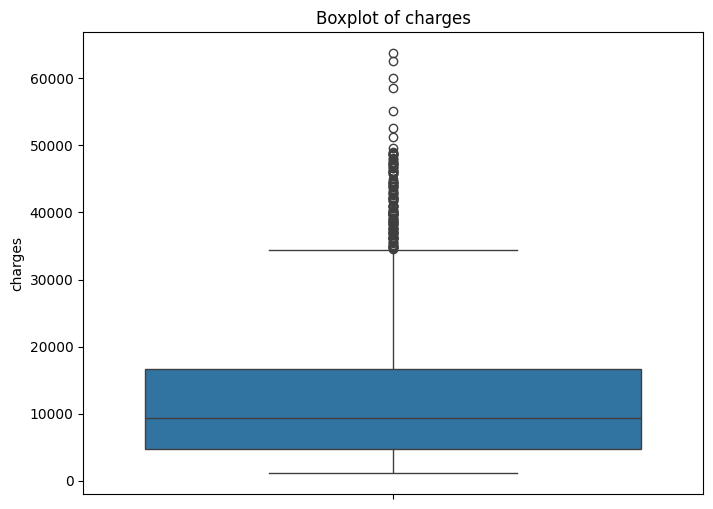

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['charges'])
plt.title('Boxplot of charges')
plt.ylabel('charges')
plt.show()

# **Eksplorasi Data (EDA)**

## **Comparison/Perbandingan**

Aktivitas: Membandingkan rata-rata biaya asuransi (charges) berdasarkan status perokok (smoker).

Tujuan: Mengidentifikasi apakah terdapat perbedaan signifikan biaya asuransi antara perokok dan bukan perokok.

Visualisasi: Bar Chart (Grafik Batang).

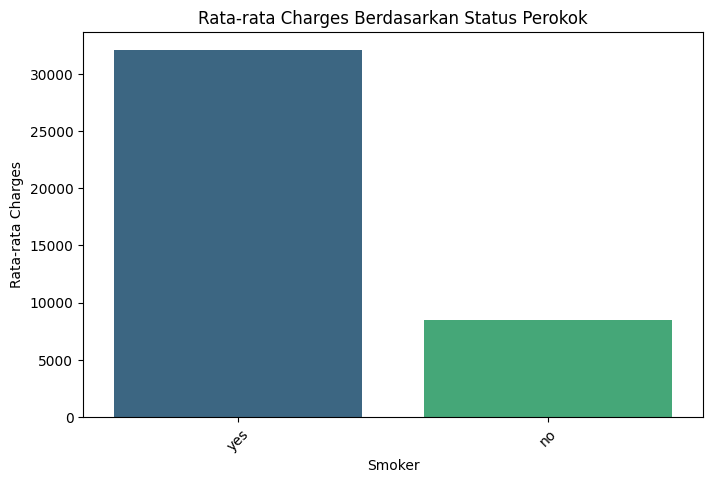

In [19]:
charges_smoker = df.groupby('smoker')['charges'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=charges_smoker.index, y=charges_smoker.values, palette='viridis', hue=charges_smoker.index, legend=False)
plt.title('Rata-rata Charges Berdasarkan Status Perokok')
plt.xlabel('Smoker')
plt.ylabel('Rata-rata Charges')
plt.xticks(rotation=45)
plt.show()

Berdasarkan bar chart rata-rata charges berdasarkan status perokok, terlihat bahwa perokok memiliki rata-rata biaya asuransi yang jauh lebih tinggi dibandingkan dengan non-perokok. Hal ini menunjukkan bahwa kebiasaan merokok berdampak signifikan terhadap besarnya biaya asuransi, sehingga status merokok menjadi faktor penting dalam menentukan premi asuransi. Perbedaan yang jelas ini juga menekankan perlunya strategi penilaian risiko yang berbeda untuk perokok dan non-perokok dalam industri asuransi kesehatan.

## **Composition/Komposisi**

Aktivitas: Melihat proporsi peserta berdasarkan status perokok (smoker).

Tujuan: Mengetahui perbandingan jumlah peserta yang merokok dan tidak merokok dalam dataset.

Visualisasi: Pie Chart (Grafik Lingkaran)

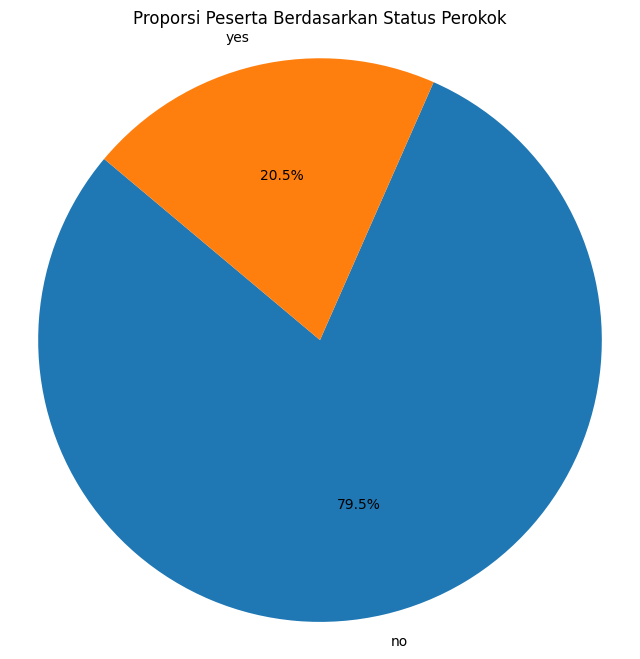

In [20]:
smoker_count = df['smoker'].value_counts()

plt.figure(figsize=(8,8))
smoker_count.plot(kind='pie',
                  autopct='%1.1f%%',
                  startangle=140)

plt.title('Proporsi Peserta Berdasarkan Status Perokok')
plt.ylabel('')
plt.axis('equal')
plt.show()

Berdasarkan pie chart proporsi peserta menurut status perokok, mayoritas peserta adalah non-perokok, sedangkan peserta yang merokok hanya sebagian kecil dari total. Hal ini menunjukkan bahwa sebagian besar populasi dalam dataset cenderung tidak merokok, sehingga perokok merupakan kelompok minoritas tetapi tetap memiliki pengaruh signifikan terhadap rata-rata biaya asuransi, seperti yang terlihat pada analisis sebelumnya.

## **Distribution/Distribusi**

Aktivitas:
Menganalisis penyebaran biaya asuransi pada kolom charges.

Tujuan:
Mengidentifikasi pola distribusi data serta melihat apakah terdapat ketimpangan nilai yang signifikan.

Visualisasi: Histogram

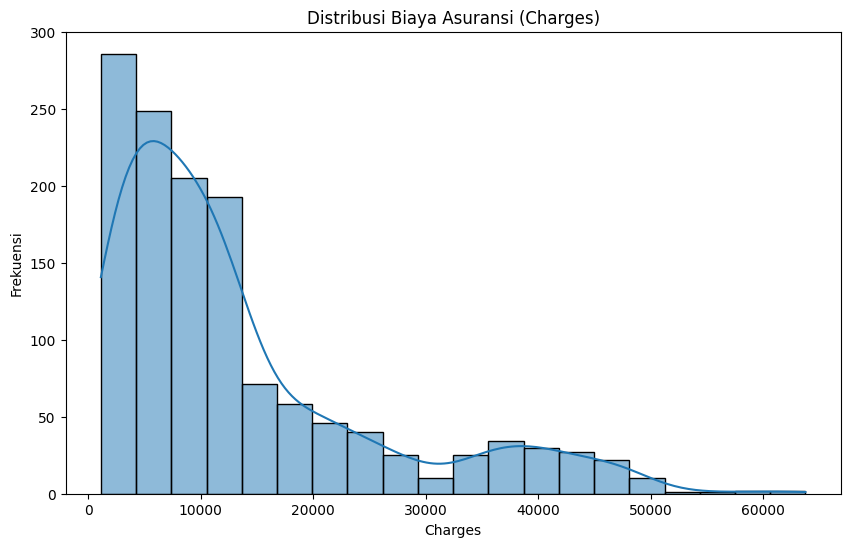

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(df['charges'], bins=20, kde=True)

plt.title('Distribusi Biaya Asuransi (Charges)')
plt.xlabel('Charges')
plt.ylabel('Frekuensi')
plt.show()

Berdasarkan histogram distribusi biaya asuransi, sebagian besar peserta memiliki biaya yang relatif rendah, sementara hanya sedikit peserta yang memiliki biaya sangat tinggi. Distribusi ini cenderung skewed ke kanan, menunjukkan adanya kelompok peserta dengan beban biaya tinggi yang bisa dipengaruhi oleh faktor seperti status perokok, usia, atau BMI. Informasi ini penting untuk memahami variasi biaya dalam populasi dan membantu perusahaan asuransi dalam merencanakan premi serta strategi manajemen risiko.

## **Relationship/Hubungan**


Aktivitas: Menganalisis korelasi antara nilai BMI dengan biaya asuransi (charges).

Tujuan: Mengetahui apakah peningkatan nilai BMI berhubungan dengan peningkatan biaya asuransi, serta melihat seberapa kuat hubungan antar kedua variabel tersebut.

Visualisasi: Heatmap

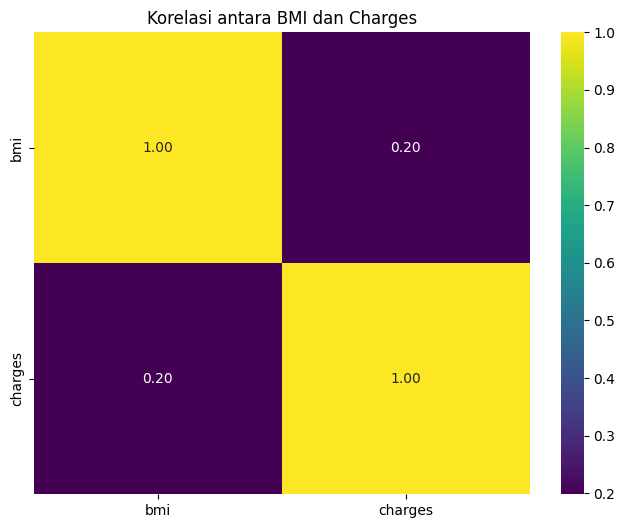

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(data=df[['bmi','charges']].corr(),
            annot=True,
            cmap='viridis',
            fmt='.2f')

plt.title('Korelasi antara BMI dan Charges')
plt.show()

Berdasarkan heatmap korelasi antara BMI dan biaya asuransi, terlihat adanya korelasi positif, meskipun nilainya sedang. Hal ini menunjukkan bahwa peserta dengan BMI lebih tinggi cenderung memiliki biaya asuransi yang lebih tinggi, tetapi faktor lain seperti usia, status perokok, dan kondisi kesehatan juga berpengaruh signifikan terhadap charges.

# **Data Preparation**

### **Data Type**

In [23]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64
Kategori_BMI,object


Pada kalom diatas, dapat dilihat semua kolom  (age, sex, bmi, children, smoker, region, charges) sudah sesuai dengan tipe data yang seharusnya.



*   age (int64):  usia peserta, berupa angka bulat.

* sex (object): jenis kelamin peserta, berupa teks (male atau female).

* bmi (float64): Body Mass Index peserta, berupa angka desimal.

* children (int64):  jumlah anak peserta, berupa angka bulat.

* smoker (object): status merokok peserta, berupa teks (yes atau no).

* region (object): wilayah tempat tinggal peserta, berupa teks (northwest, southeast, dll.).

charges (float64): biaya asuransi peserta, berupa angka desimal.

Karena semua kolom sudah sesuai tipe data, dataset ini siap untuk dianalisis lebih lanjut.

## **Inconsistent Values**

Pada analisis inconsistent values sebelumnya sudah dilakukan analisis menggunakan fungsi .unique() untuk melihat apakah terdapat perbedaan penulisan pada kolom. Berdasarkan hasil pengecekan, semua kolom tidak ditemukan perbedaan huruf besar dan keci maupun variasi penulisan lainnya, seluruh data sudah memiliki format yang konsisten. Oleh karena itu tidak perlu dilakukan perbaikan pada tahap ini.

##**Missing Value**


Pada tahap pengecekan missing values, dilakukan pemeriksaan menggunakan fungsi isna().sum() untuk melihat apakah terdapat data yang kosong pada setiap kolom. Berdasarkan hasil pengecekan, seluruh kolom menunjukkan nilai 0, yang berarti tidak terdapat missing value pada dataset. Oleh karena itu, tidak diperlukan proses penghapusan maupun imputasi data, dan dataset sudah siap digunakan untuk tahap analisis selanjutnya.

In [24]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Persentase missing value'])

,Persentase missing value
age,0.0
sex,0.0
bmi,0.0
children,0.0
smoker,0.0
region,0.0
charges,0.0
Kategori_BMI,0.0


##**Duplicate Values**

Pada tahap pengecekan duplicated values, ditemukan satu baris data yang terduplikasi, yaitu data yang memiliki isi sama persis di seluruh kolom. Data duplikat ini dapat mempengaruhi hasil analisis karena menyebabkan perhitungan menjadi tidak akurat. Oleh karena itu, data duplikat dihapus agar setiap baris data hanya mewakili satu data yang unik.

In [25]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges,Kategori_BMI


Dari hasil pengecekan, ditemukan 1 data yang terduplikasi. Karena itu, data tersebut perlu dihapus agar tidak mempengaruhi hasil analisis.

In [26]:
df = df.drop_duplicates()

Setelah itu, dilakukan pengecekan kembali untuk memastikan bahwa data duplikat sudah terhapus.

In [27]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges,Kategori_BMI


##**Outliers**

Pada tahap ini dilakukan peninjauan terhadap kolom numerik, yaitu bmi, children, age dan charges untuk melihat apakah terdapat nilai yang terlalu tinggi atau terlalu rendah dibandingkan data lainnya.



In [28]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
age,0.000000
bmi,0.673149
children,0.000000
charges,10.396410


1. bmi

Pada kolom bmi, ditemukan outlier dengan persentase sebesar 0,6% dari total data. Persentase tersebut tergolong sangat kecil sehingga tidak memberikan pengaruh yang signifikan terhadap distribusi data secara keseluruhan. Selain itu, nilai BMI yang berada di luar batas perhitungan statistik masih berada dalam rentang yang realistis dan memungkinkan secara medis. Oleh karena itu, data pada kolom ini tetap dipertahankan dan tidak dilakukan penghapusan maupun perbaikan.


2. charges

Pada kolom ini juga terdapat nilai  outlier dengan persentase sebesar 10.3% yang jauh lebih tinggi dibandingkan sebagian besar data lainnya. Hal ini masih dapat dianggap wajar karena biaya asuransi kesehatan dapat meningkat secara signifikan tergantung pada usia, kebiasaan merokok, dan kondisi kesehatan seseorang. Oleh karena itu, nilai ekstrem pada kolom ini tidak dihapus karena hal ini bergntung pada kondisi setiap orangnya.

3. age dan children

Pada kedua kolom ini tidak ditemukan nilai yang tidak wajar. Rentang usia masih realistis, dan jumlah anak juga berada dalam batas yang masuk akal. Oleh karena itu, tidak diperlukan perbaikan pada kedua kolom tersebut.

# **Construct Data**

Pada tahap data construction, saya akan menambahkan kolom baru bernama Kategori_BMI yang bertujuan untuk mengelompokkan nilai BMI ke dalam kategori yang lebih terstruktur dan mudah dianalisis. Pengelompokan ini mengacu pada standar klasifikasi Indeks Massa Tubuh, yaitu Underweight (BMI < 18,5), Normal (18,5–24,9), Overweight (25–29,9), dan Obese (≥ 30).

Penambahan kolom ini dilakukan untuk mempermudah proses analisis, khususnya dalam membandingkan biaya asuransi (charges) berdasarkan kondisi berat badan. Dengan adanya pengelompokan tersebut, pola hubungan antara kondisi fisik dan besarnya biaya asuransi dapat diamati secara lebih jelas dan informatif dibandingkan apabila hanya menggunakan nilai BMI dalam bentuk numerik.

In [29]:
def kategori_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['Kategori_BMI'] = df['bmi'].apply(kategori_bmi)

Pada tahap data construction, selain menambahkan kolom Kategori_BMI, juga dibuat kolom baru bernama Kategori_Usia. Kolom ini dibuat dengan mengelompokkan data usia (age) ke dalam beberapa rentang usia, seperti Dewasa Awal, Dewasa, dan Lansia.

Tujuan pengelompokan ini adalah untuk mempermudah analisis biaya asuransi (charges) berdasarkan kelompok umur. Dengan mengubah usia dari bentuk angka menjadi kategori, pola perbedaan biaya antar kelompok usia dapat terlihat dengan lebih jelas.

In [30]:
def kategori_usia(age):
    if age <= 30:
        return 'Dewasa Awal'
    elif age <= 45:
        return 'Dewasa'
    else:
        return 'Lansia'

df['Kategori_Usia'] = df['age'].apply(kategori_usia)

Selanjutnya pada tahap data construction, selain menambahkan kolom Kategori_BMI dan Kategori_Usia, juga ditambahkan kolom baru bernama Kategori_Charges. Kolom ini dibuat untuk mengelompokkan biaya asuransi (charges) ke dalam beberapa kategori, yaitu Rendah, Sedang, dan Tinggi berdasarkan distribusi data.

Penambahan kolom ini bertujuan untuk mempermudah analisis perbandingan tingkat biaya antar kelompok pelanggan. Dengan adanya pengelompokan tersebut, pola perbedaan biaya asuransi dapat terlihat dengan lebih jelas dan lebih mudah dipahami dibandingkan jika hanya menggunakan nilai biaya dalam bentuk angka.



In [54]:

def KATEGORI_CHARGES(charges):
    if charges <= 12000:
        return 'Rendah'
    elif charges <= 30000:
        return 'Sedang'
    else:
        return 'Tinggi'


df['Kategori_Charges'] = df['charges'].apply(KATEGORI_CHARGES)


cek kembali apakah kolom baru sudah masuk dalam dataset.

In [55]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Kategori_BMI,Kategori_Usia,Kategori_Charges
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Dewasa Awal,Sedang
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Dewasa Awal,Rendah
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Dewasa Awal,Rendah
3,33,male,22.705,0,no,northwest,21984.47061,Normal,Dewasa,Sedang
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Dewasa,Rendah


#**Data Reduction**

Pada tahap ini tidak dilakukan penghapusan kolom (data reduction) karena seluruh kolom dalam dataset masih relevan dan dibutuhkan untuk analisis biaya asuransi. Setiap kolom memiliki peran penting, seperti age untuk mengetahui pengaruh usia terhadap biaya, sex untuk melihat perbedaan biaya berdasarkan jenis kelamin, bmi untuk mengukur dampak indeks massa tubuh, children untuk menilai pengaruh jumlah anak, smoker untuk menentukan pengaruh kebiasaan merokok, region untuk mengetahui perbedaan biaya berdasarkan wilayah, serta charges sebagai variabel target analisis.

Tidak ditemukan kolom yang bersifat tidak penting, atau tidak berhubungan dengan tujuan analisis. Oleh karena itu, seluruh kolom tetap dipertahankan agar informasi yang tersedia lengkap dan dapat mendukung proses analisis secara menyeluruh.

# **Menyimpan Dataset**

In [33]:
df.to_csv('/content/drive/MyDrive/AVD/insurance (1).csv', index=False)